# Setup

In [3]:
import pandas as pd
import os

# Log Conversion (pandas to log and vice versa)
from pm4py.objects.conversion.log import factory as log_conv
from pm4py.util import constants
# Alpha Miner
from pm4py.algo.discovery.alpha import factory as alpha_miner
# Petri Net visualization
from pm4py.visualization.petrinet import factory as pn_vis_factory

from datetime import datetime

In [4]:
# Path to the directory in which you should save you images (models and 
# other important analysis outputs where zooming in with an external program might be interesting)
path_save_base = os.path.abspath('./figures/')

In [5]:
# Mapping between dataset columns and PM4Py keys
# Many functions will require you to pass this as additional parameters
param_keys={constants.PARAMETER_CONSTANT_CASEID_KEY: 'Patient',
    constants.PARAMETER_CONSTANT_RESOURCE_KEY: 'Resource', 
    constants.PARAMETER_CONSTANT_ACTIVITY_KEY: 'Activity'}

# Preprocessing Functions

## DF Timestamps / Resource Formatting

In [6]:
def preprocess_df(df):
    """Preprocessing function that parses the timestamps and resource information.

    Converts timestamps to python datetime.
    Splits Resource information. PM4Py assumes comma separated resources.

    :df: DataFrame that should be processed
    :returns: Preprocessed DataFrame 

    """
    # Convert start timestamp
    df['start_timestamp'] = df['start_timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    # Convert end timestamp
    df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    # Social Network Analysis wants comma separated resources
    df.loc[:, 'Resource'] = df.loc[:, 'Resource'].map(lambda s: s.replace('-', ',') if isinstance(s, str) else '')
    return df


# Load Data

In [7]:
# Data path
path_base_log = os.path.abspath('../')

In [8]:
# Read csv file into pandas DataFrame
df = pd.read_csv(os.path.join(path_base_log, 'log.csv'))
# Preprocess the DataFrame
df = preprocess_df(df)

In [9]:
log = log_conv.apply(df, parameters=param_keys)

# Example Alpha Miner Model on Raw Data

In [9]:
# Mine petri net with inductive miner
net, initial_marking, final_marking = alpha_miner.apply(log, parameters=param_keys)

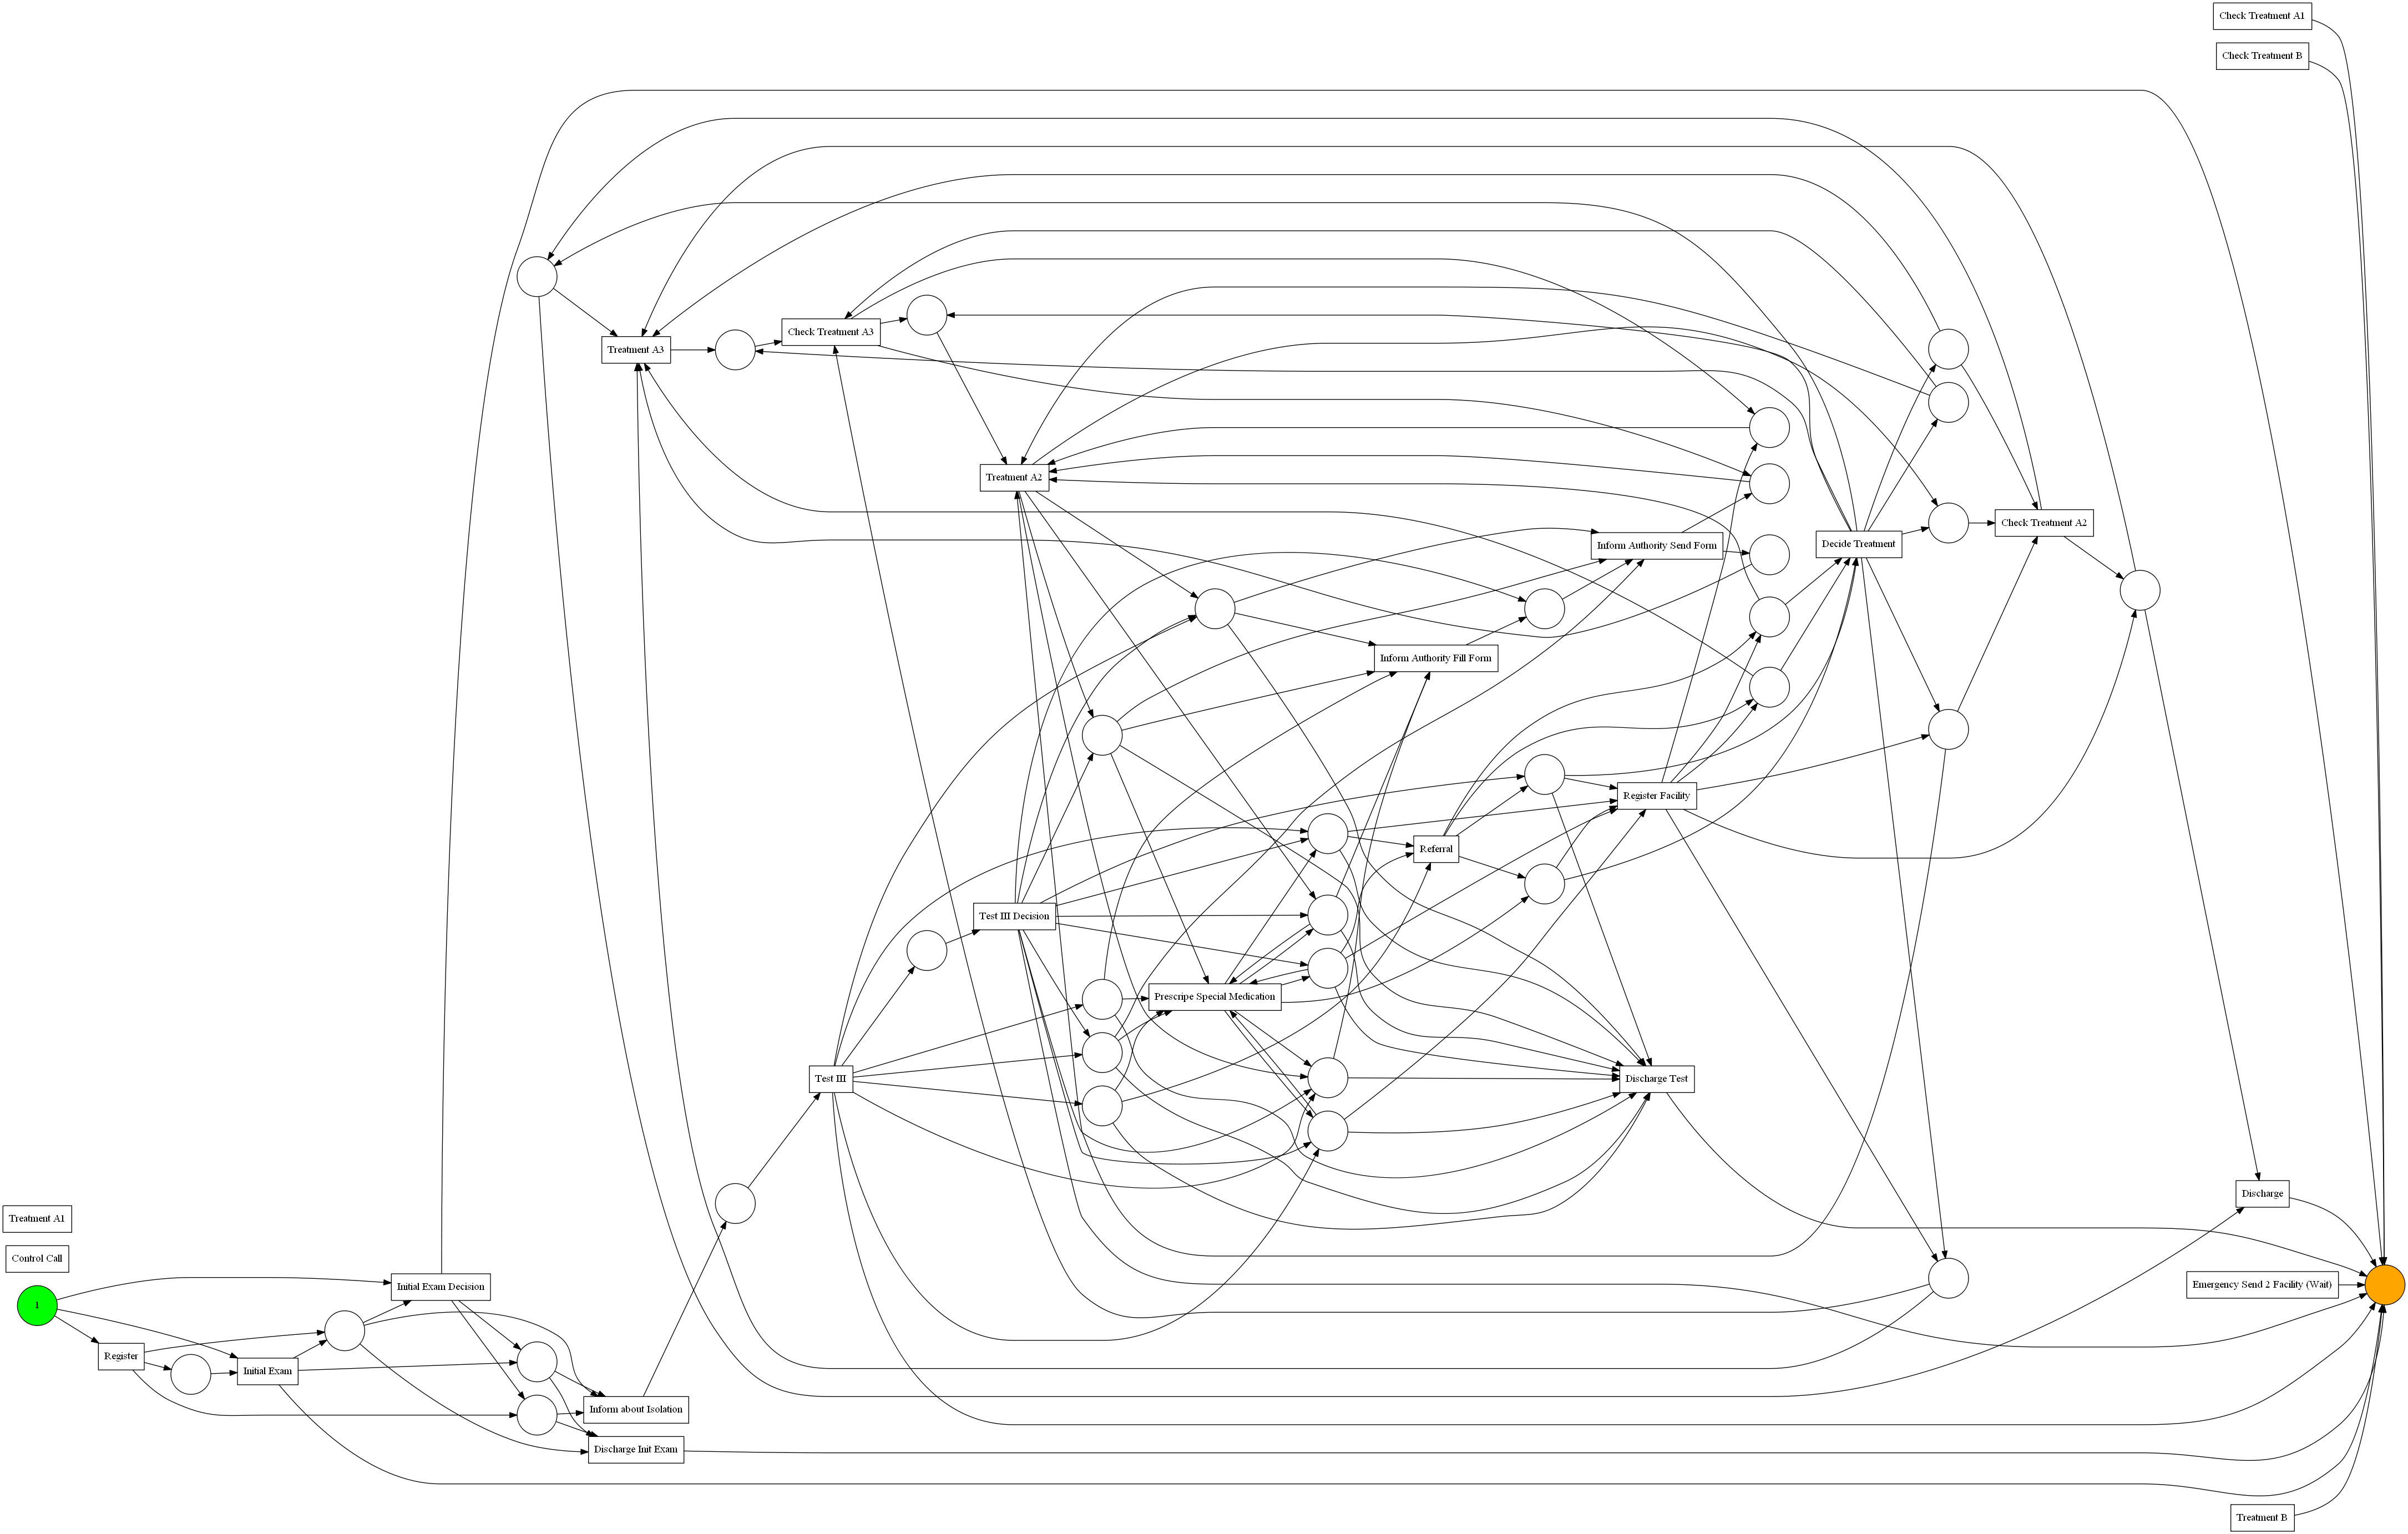

In [10]:
# Visualize the petri net
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)